# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [50]:
# Import numpy and pandas
import pandas as pd
import numpy as np
import statsmodels.api as stap
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [4]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [5]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [6]:
sensor.isna().any().any()

False

How many rows and columns are in our data?

In [7]:
# row number->1751 column number->12
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [8]:
# Your code here:
periods=len(sensor)
time_series_index=pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10',periods=periods)
time_series_index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [9]:
# Your code here:
sensor=sensor.set_index(time_series_index)
sensor

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 00:29:06,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
2018-01-01 00:29:07,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
2018-01-01 00:29:08,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
2018-01-01 00:29:09,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [29]:
plt.rcParams["figure.figsize"] = (12,8)

Figure(864x576)


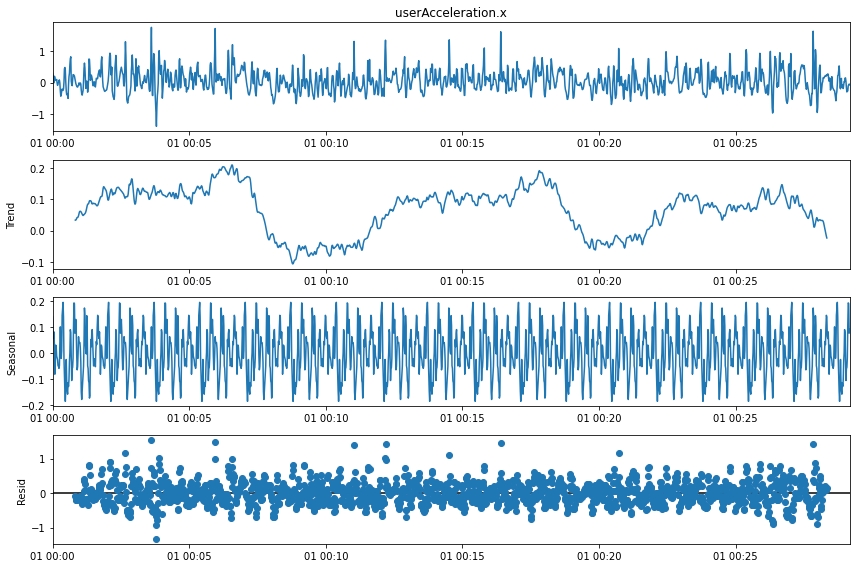

In [44]:
# Your code here:
print(stap.tsa.seasonal_decompose(sensor['userAcceleration.x'],period=100).plot())

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

Figure(864x576)


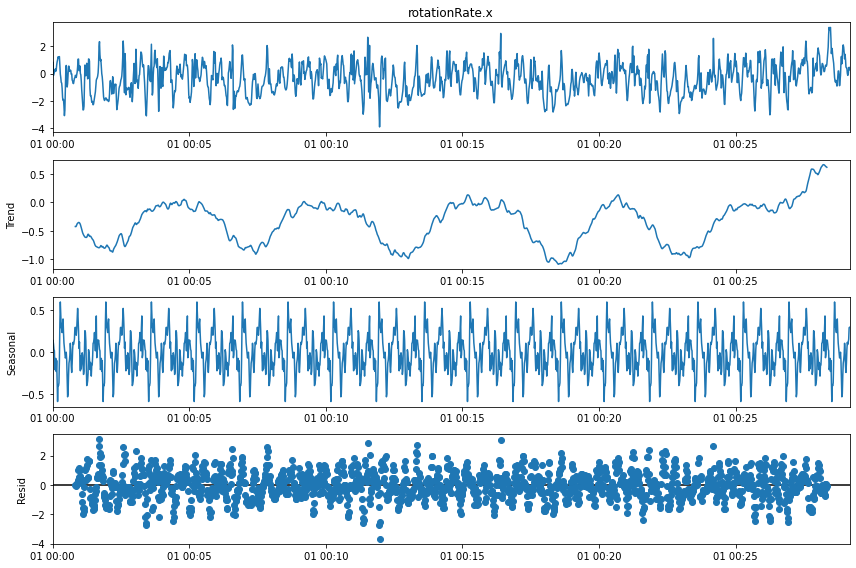

In [45]:
print(stap.tsa.seasonal_decompose(sensor['rotationRate.x'],period=100).plot())

It looks like we have seasonality

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

(-0.15, 0.15)

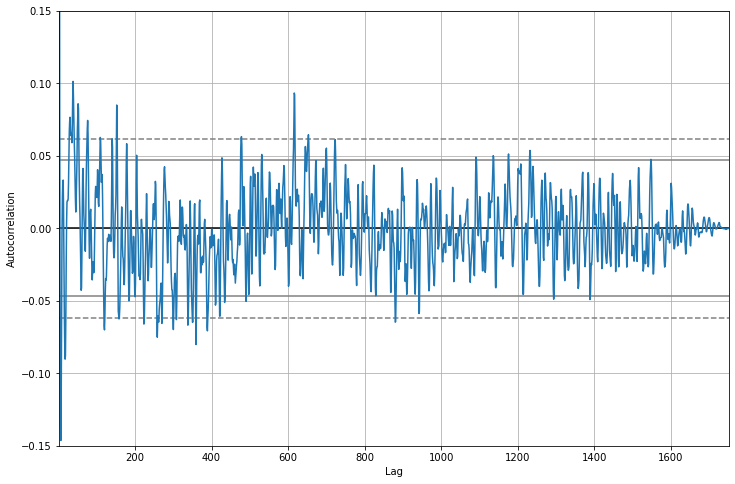

In [32]:
# Your code here:
ax = autocorrelation_plot(sensor['userAcceleration.x'])
ax.set_ylim([-0.15, 0.15])

/Users/malva/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


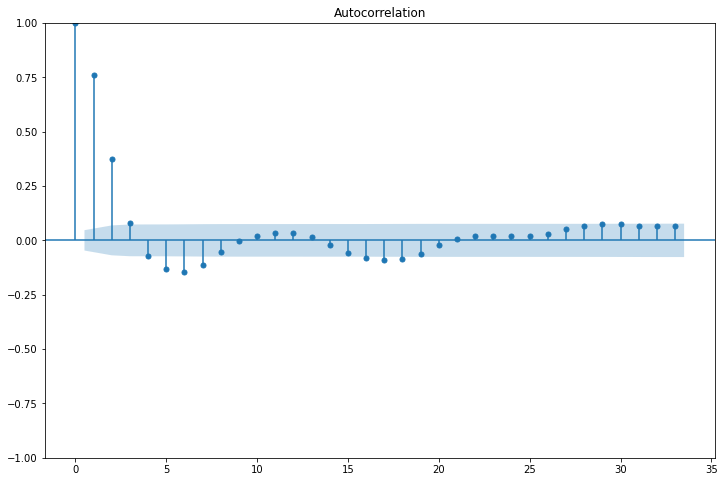

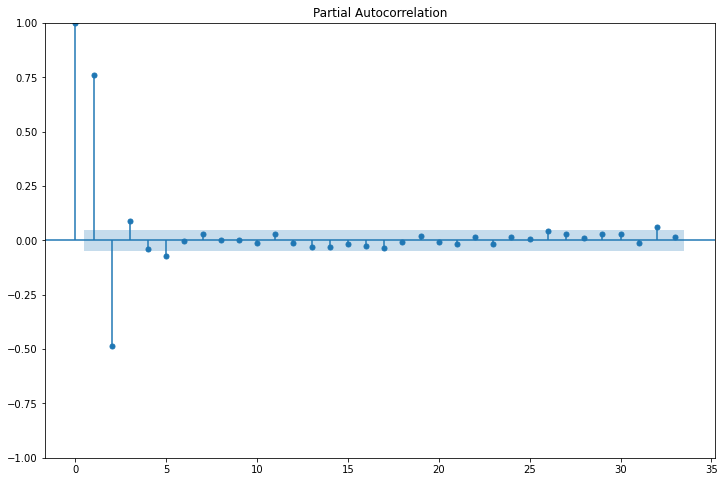

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(sensor['userAcceleration.x']);
plot_pacf(sensor['userAcceleration.x']);

when trying to get the a value using the previous ones, we get a multiple regresion with coeficients 
- partial is only the actual with the previous one (not going point by point)
-total is only the actual with the previous one (going point by point)

In [ ]:
#We can see that the first 2 lags do have a lot of correlation

Create a lag plot for `rotationRate.x`

(-0.25, 0.25)

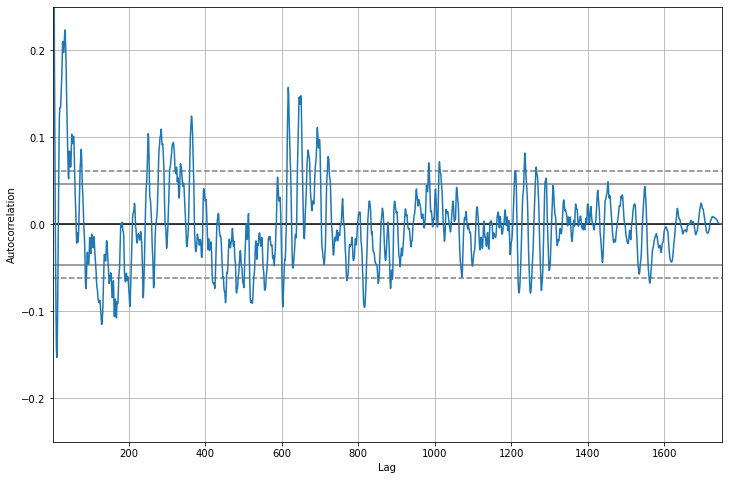

In [34]:
# Your code here:
ax = autocorrelation_plot(sensor['rotationRate.x'])
ax.set_ylim([-0.25, 0.25])

/Users/malva/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


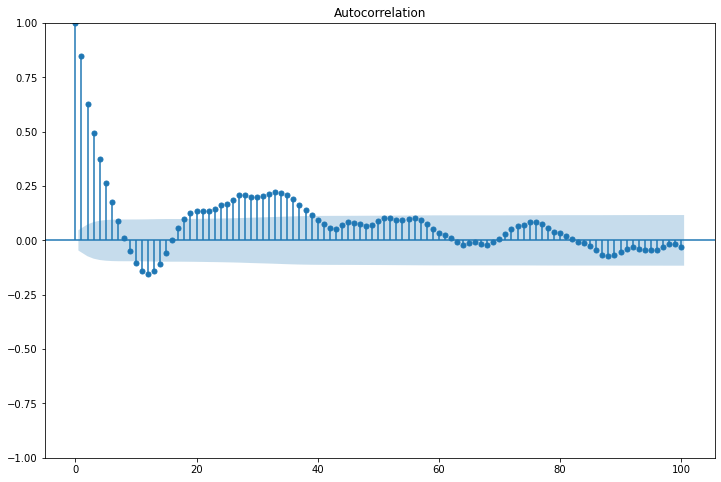

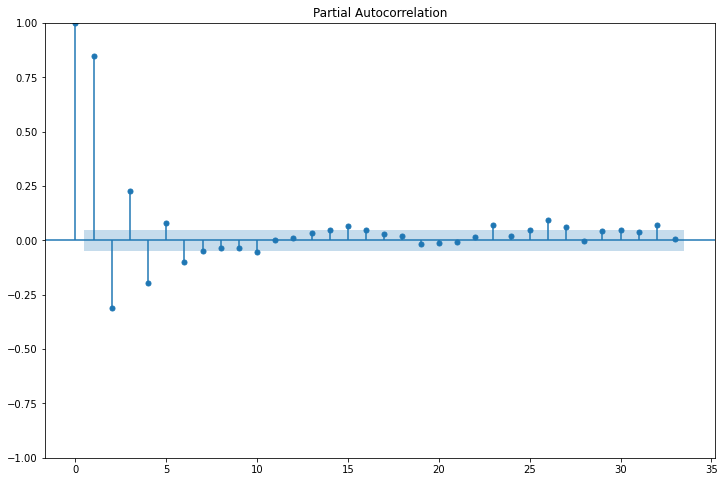

In [37]:
plot_acf(sensor['rotationRate.x'],lags=100);
plot_pacf(sensor['rotationRate.x']);

What are your conclusions from both visualizations?

- userAcceleration: We can see that the first 2 lags do have a lot of correlation
- userAcceleration: It looks like we have seasonality and some noise, also looking at the trend, we can see
that the accelaration is stationary as values are not growhing or decreasing with the time.
- rotationRate: we can see there is correlation for more lags than the other one (like to 40 lags). The correlation 
goes from positive to negative (as is a rotative varible)
- rotationRate: is also stacional, also looking at the trend, we can see
that the rotationRate is stationary as values are not growhing or decreasing with the time. 

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [38]:
# Your code here:
from statsmodels.tsa.stattools import adfuller
result_acceleration = adfuller(sensor['userAcceleration.x'], autolag="AIC")
print('Acceleration: ', result_acceleration[:2])
result_rotation= adfuller(sensor['rotationRate.x'], autolag="AIC")
print('Rotation: ', result_rotation[:2])

Acceleration:  (-17.95799408616974, 2.823439483037563e-30)
Rotation:  (-5.269860625086421, 6.320230335912189e-06)


What are your conclusions from this test?

With this test we can assume that both variables are stationary because p-values are smaller than the threshold

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [51]:
#Modelo autoregresivo (regresión lineal usando como variable a predecir el valor actual y como variables
#independientes los anteriores, usando los lags)
#Media movil: repetir el valor anterior o ponderar y dar más valor con un coeficiente de decaimiento
#ARMA integra ambos conceptos (modelo autoregresivo de media movil)

In [71]:
# Your code here:
train = sensor[:-10]
test = sensor[-10:]

order=(p,d,q): 
- p (number of lags of AR, auto regression model)
- d (ARMA is for stationary time series, when the time serie is not stationary (we need to differenciate the model for converting it to stationary, d is the number of times we need to differenciate it)
- q (MEA: movil average order, how many periods back you go for the MEA)


In [93]:
from statsmodels.tsa.arima.model import ARIMA
arima_acceleration = ARIMA(train['userAcceleration.x'], order=(2,0,1)).fit()
arima_acceleration.summary()

/Users/malva/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/Users/malva/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/Users/malva/miniconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     userAcceleration.x   No. Observations:                 1741
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 373.401
Date:                Sun, 27 Mar 2022   AIC                           -736.803
Time:                        13:50:20   BIC                           -709.492
Sample:                    01-01-2018   HQIC                          -726.704
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0637      0.016      3.994      0.000       0.032       0.095
ar.L1          0.9882      0.036     27.630      0.000       0.918       1.058
ar.L2         -0.3788      0.033    -11.637      0.000      -0.443      -0.315
ma.L1          0.1824      0.039      4.643      0.000       0.105       0.259
sigma2         0.0381      0.001     46.070      0.000       0.036       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1776.70
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.34
Prob(H) (two-sided):                  0.60   Kurtosis:                         7.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [94]:
# Your code here:
from statsmodels.tools.eval_measures import rmse
prediction = arima_acceleration.predict(start=1742, end=1751)
prediction

2018-01-01 00:29:02    0.142889
2018-01-01 00:29:03    0.100513
2018-01-01 00:29:04    0.070097
2018-01-01 00:29:05    0.056091
2018-01-01 00:29:06    0.053770
2018-01-01 00:29:07    0.056783
2018-01-01 00:29:08    0.060638
2018-01-01 00:29:09    0.063308
2018-01-01 00:29:10    0.064485
2018-01-01 00:29:11    0.064638
Freq: S, Name: predicted_mean, dtype: float64

In [95]:
testing_model = rmse(prediction, test['userAcceleration.x'])
testing_model

0.21843095555899292

In [96]:
mape = np.mean(np.abs((prediction - test['userAcceleration.x'])/test['userAcceleration.x']))*100
mape

172.45954326112687

In [97]:
np.mean(abs(test['userAcceleration.x']))

0.14974369999999998